# Stroke Prediction Dataset
## Data
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy, pandas as pd, seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, auc
from utils.CorrelationMatirx import CorrelationMatrixHeatMap
"""
The original data came from the [Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine Learning Repository.
Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).
The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.
"""
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
print(data.isna().sum())
#data.head()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
data.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

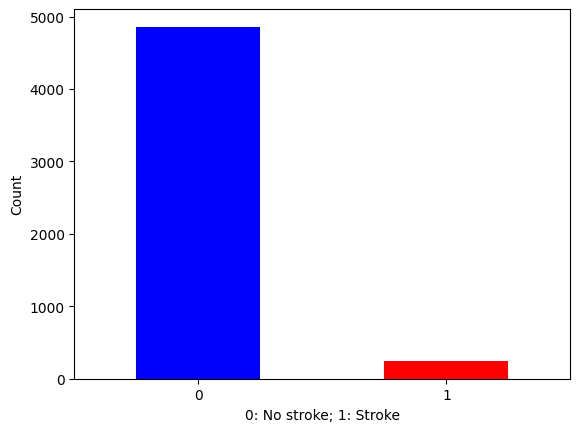

In [7]:
# The value_counts() method in Pandas, by default, returns the counts of unique values in descending order of their frequency. This means the most frequently occurring value will appear first in the resulting Series.
data.stroke.value_counts().plot.bar(color=["blue", "red"]);
plt.xlabel("0: No stroke; 1: Stroke");
plt.ylabel("Count");
plt.xticks(rotation=0); # Make the xlabels vertical

In [9]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
print(f"mean: {data.bmi.mean()}, median: {data.bmi.median()}")

mean: 28.893236911794666, median: 28.1


In [6]:
data[data.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [2]:
# Correlation Matrix
print("Correlation Matrix:")
correlation = data.corr()
print(correlation)
CorrelationMatrixHeatMap(correlation)

Correlation Matrix:


ValueError: could not convert string to float: 'Male'